In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
import nltk
import string
import glob
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer

In [3]:
# Data Reading
path = "Data"
df  = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'Searh'],
      dtype='object')

<AxesSubplot:ylabel='lang'>

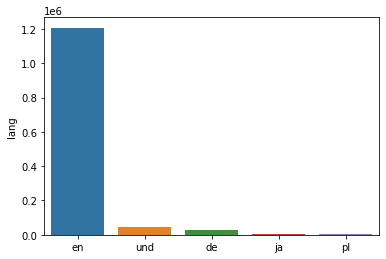

In [4]:
# Shows different language in the form of bar plot
sns.barplot(x = df.lang.value_counts()[:5].index, y = df.lang.value_counts()[:5], errcolor='.26', errwidth='.25')

In [5]:
df = df[["content", "lang"]]
print(df.head())

                                             content lang
0  Is that the same expensive and ineffective bor...   en
1  @DonWaifu @gabehayes @aaronjmate So the Americ...   en
2  Maybe if one military unit from Ukraine crosse...   en
3  Volunteers cross Polish border into Ukraine to...   en
4  @MarkHertling BUT... theres no Russian aircraf...   en


In [6]:
# Drop NULL and duplicate values from content field
df = df.dropna(subset=['content'])
 # It will remove duplicates as well as it converts into lowercase letters
df = df.apply(lambda x: x.astype(str).str.lower()).drop_duplicates(subset=['content'])
len(df)

1095979

In [7]:
# Remove all other language tweets apart from english
df = df.loc[df['lang'] == 'en']
df.lang.value_counts()

en    992928
Name: lang, dtype: int64

In [8]:
df['content'][0]

0    is that the same expensive and ineffective bor...
0    @radiofreetom so if putin have russian troops ...
0    joe biden says how do we get to a place where ...
0    @ritchietorres please get it done!! arm ukrain...
0    @younes_messili israel-palestine issue is a bi...
0    @ronanmcmanus @carolecadwalla @estellecostanza...
0    there was an anti war protest for #ukraine as ...
Name: content, dtype: object

In [9]:
# Tokenization
tt = TweetTokenizer()
df['content'].apply(tt.tokenize)

0         [is, that, the, same, expensive, and, ineffect...
1         [@donwaifu, @gabehayes, @aaronjmate, so, the, ...
2         [maybe, if, one, military, unit, from, ukraine...
3         [volunteers, cross, polish, border, into, ukra...
4         [@markhertling, but, ..., theres, no, russian,...
                                ...                        
231619    [rusia, wants, to, take, back, ukraine, ,, the...
231620    [a, positive, for, russia, is, that, ,, accord...
231621    [@kylegriffin1, @karyn_resists, “, further, in...
231622    [@remid0d0s0, @billkristol, i, fully, support,...
231623    [biden, warns, putin, ?, what, does, acting, d...
Name: content, Length: 992928, dtype: object

In [10]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# clean texts
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df["content"] = df["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Remove punctuation from the text
PUNCT_TO_REMOVE = string.punctuation
def rm_punct(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["content"].apply(lambda content: rm_punct(content))
df.head()

,content,lang,text_wo_punct
0,expens ineffect border wall smuggler breach t...,en,expens ineffect border wall smuggler breach t...
1,donwaifu gabehay aaronjm american dress russia...,en,donwaifu gabehay aaronjm american dress russia...
2,mayb one militari unit ukrain cross border ini...,en,mayb one militari unit ukrain cross border ini...
3,volunt cross polish border ukrain fight russia...,en,volunt cross polish border ukrain fight russia...
4,markhertl there russian aircraft fli near lviv...,en,markhertl there russian aircraft fli near lviv...


In [12]:
STOP = set(STOPWORDS)
def rm_stop(word):
    return " ".join([i for i in str(word).split() if i not in STOP])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda content: rm_stop(content))
df.head()

,content,lang,text_wo_punct,text_wo_stop
0,expens ineffect border wall smuggler breach t...,en,expens ineffect border wall smuggler breach t...,expens ineffect border wall smuggler breach ti...
1,donwaifu gabehay aaronjm american dress russia...,en,donwaifu gabehay aaronjm american dress russia...,donwaifu gabehay aaronjm american dress russia...
2,mayb one militari unit ukrain cross border ini...,en,mayb one militari unit ukrain cross border ini...,mayb one militari unit ukrain cross border ini...
3,volunt cross polish border ukrain fight russia...,en,volunt cross polish border ukrain fight russia...,volunt cross polish border ukrain fight russia...
4,markhertl there russian aircraft fli near lviv...,en,markhertl there russian aircraft fli near lviv...,markhertl russian aircraft fli near lviv carv ...


In [13]:
stem = PorterStemmer()
def stem_words(val):
    return " ".join([stem.stem(i) for i in val.split()])

df["text_stemmed"] = df["text_wo_stop"].apply(lambda content: stem_words(content))
df.head()

,content,lang,text_wo_punct,text_wo_stop,text_stemmed
0,expens ineffect border wall smuggler breach t...,en,expens ineffect border wall smuggler breach t...,expens ineffect border wall smuggler breach ti...,expen ineffect border wall smuggler breach tim...
1,donwaifu gabehay aaronjm american dress russia...,en,donwaifu gabehay aaronjm american dress russia...,donwaifu gabehay aaronjm american dress russia...,donwaifu gabehay aaronjm american dress russia...
2,mayb one militari unit ukrain cross border ini...,en,mayb one militari unit ukrain cross border ini...,mayb one militari unit ukrain cross border ini...,mayb one militari unit ukrain cross border ini...
3,volunt cross polish border ukrain fight russia...,en,volunt cross polish border ukrain fight russia...,volunt cross polish border ukrain fight russia...,volunt cross polish border ukrain fight russia...
4,markhertl there russian aircraft fli near lviv...,en,markhertl there russian aircraft fli near lviv...,markhertl russian aircraft fli near lviv carv ...,markhertl russian aircraft fli near lviv carv ...


In [14]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_stemmed"].apply(lambda content: lemmatize_words(content))
df.head()

,content,lang,text_wo_punct,text_wo_stop,text_stemmed,text_lemmatized
0,expens ineffect border wall smuggler breach t...,en,expens ineffect border wall smuggler breach t...,expens ineffect border wall smuggler breach ti...,expen ineffect border wall smuggler breach tim...,expen ineffect border wall smuggler breach tim...
1,donwaifu gabehay aaronjm american dress russia...,en,donwaifu gabehay aaronjm american dress russia...,donwaifu gabehay aaronjm american dress russia...,donwaifu gabehay aaronjm american dress russia...,donwaifu gabehay aaronjm american dress russia...
2,mayb one militari unit ukrain cross border ini...,en,mayb one militari unit ukrain cross border ini...,mayb one militari unit ukrain cross border ini...,mayb one militari unit ukrain cross border ini...,mayb one militari unit ukrain cross border ini...
3,volunt cross polish border ukrain fight russia...,en,volunt cross polish border ukrain fight russia...,volunt cross polish border ukrain fight russia...,volunt cross polish border ukrain fight russia...,volunt cross polish border ukrain fight russia...
4,markhertl there russian aircraft fli near lviv...,en,markhertl there russian aircraft fli near lviv...,markhertl russian aircraft fli near lviv carv ...,markhertl russian aircraft fli near lviv carv ...,markhertl russian aircraft fli near lviv carv ...


[('ukrain', 886875), ('russia', 511609), ('nato', 310172), ('war', 280824), ('troop', 274646)]
['ukrain', 'russia', 'nato', 'war', 'troop']


<AxesSubplot:>

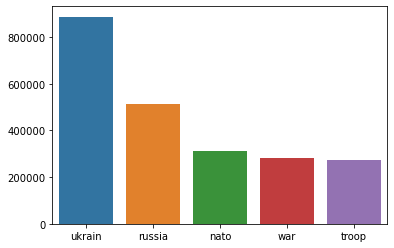

In [15]:
# Most Frequent words in a dataset
from collections import Counter
cnt = Counter()
cnt_all = Counter()

for text in df["text_lemmatized"].values:
    for word in text.split():
        cnt[word] += 1

print(cnt.most_common(5))
common_words = cnt.most_common(5)
print([i[0] for i in common_words])
sns.barplot(x = [i[0] for i in common_words], y = [i[1] for i in common_words])

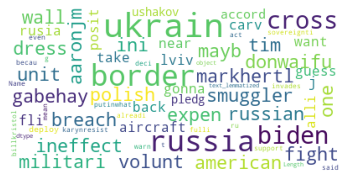

In [16]:
# Word cloud for data set
wordcloud = WordCloud(background_color='white',
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['text_lemmatized']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
# Drop the columns which is not required
df.drop(["text_wo_punct", "text_wo_stop", "text_stemmed"], axis=1, inplace=True) 
df.head()

,content,lang,text_lemmatized
0,expens ineffect border wall smuggler breach t...,en,expen ineffect border wall smuggler breach tim...
1,donwaifu gabehay aaronjm american dress russia...,en,donwaifu gabehay aaronjm american dress russia...
2,mayb one militari unit ukrain cross border ini...,en,mayb one militari unit ukrain cross border ini...
3,volunt cross polish border ukrain fight russia...,en,volunt cross polish border ukrain fight russia...
4,markhertl there russian aircraft fli near lviv...,en,markhertl russian aircraft fli near lviv carv ...


In [18]:
# Sentiment analysis

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["text_lemmatized"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["text_lemmatized"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["text_lemmatized"]]

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,content,lang,text_lemmatized,Positive,Negative,Neutral
0,expens ineffect border wall smuggler breach t...,en,expen ineffect border wall smuggler breach tim...,0.000,0.147,0.853
1,donwaifu gabehay aaronjm american dress russia...,en,donwaifu gabehay aaronjm american dress russia...,0.000,0.186,0.814
2,mayb one militari unit ukrain cross border ini...,en,mayb one militari unit ukrain cross border ini...,0.000,0.155,0.845
3,volunt cross polish border ukrain fight russia...,en,volunt cross polish border ukrain fight russia...,0.000,0.271,0.729
4,markhertl there russian aircraft fli near lviv...,en,markhertl russian aircraft fli near lviv carv ...,0.166,0.213,0.621


In [19]:
df['Polarity_Score']=df["text_lemmatized"].apply(lambda x:sentiments.polarity_scores(x)['compound'])

In [20]:
df.head()

,content,lang,text_lemmatized,Positive,Negative,Neutral,Polarity_Score
0,expens ineffect border wall smuggler breach t...,en,expen ineffect border wall smuggler breach tim...,0.000,0.147,0.853,-0.4767
1,donwaifu gabehay aaronjm american dress russia...,en,donwaifu gabehay aaronjm american dress russia...,0.000,0.186,0.814,-0.4939
2,mayb one militari unit ukrain cross border ini...,en,mayb one militari unit ukrain cross border ini...,0.000,0.155,0.845,-0.2960
3,volunt cross polish border ukrain fight russia...,en,volunt cross polish border ukrain fight russia...,0.000,0.271,0.729,-0.3818
4,markhertl there russian aircraft fli near lviv...,en,markhertl russian aircraft fli near lviv carv ...,0.166,0.213,0.621,-0.1531


In [21]:
df['Sentiment']=''
df.loc[df['Polarity_Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity_Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity_Score']<0,'Sentiment']='Negative'

In [22]:
df['Sentiment'].value_counts()

Negative    506001
Positive    262324
Neutral     224603
Name: Sentiment, dtype: int64

(array([2.54802463, 0.        , 0.        , 0.        , 0.        ,
        1.32096184, 0.        , 0.        , 0.        , 1.13101353]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

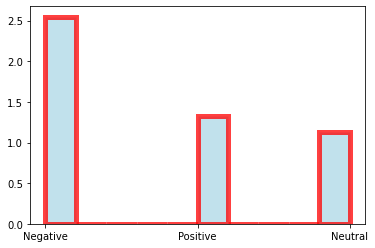

In [23]:
plt.hist(df['Sentiment'], 10, density=True, alpha=0.75, color = "lightblue", ec="red", lw=5)

In [24]:
#df[df['B']==3]['A']
lst_pos = df[df["Sentiment"] == "Positive"]['text_lemmatized']
lst_neg = df[df["Sentiment"] == "Negative"]['text_lemmatized']
lst_net = df[df["Sentiment"] == "Neutral"]['text_lemmatized']
print(len(lst_pos), len(lst_neg), len(lst_net))

262324 506001 224603


In [25]:
lsss_pos = [i for i in lst_pos]
lsss_neg = [i for i in lst_neg]
lsss_net = [i for i in lst_net]

In [26]:
lsss_pos[2]

'radiofreetom thelastword oki doki sure mention donbas amp amp yr neonazi go fellow ukrainian includ child speak russian u fund biolab amp missil eastern border cia meddl ukrain sinc wwii cia paramilitari zelenski instal actor…🤔'

[('ukrain', 239492), ('russia', 135593), ('nato', 109226), ('troop', 68373), ('invad', 66560)]
['ukrain', 'russia', 'nato', 'troop', 'invad']


<AxesSubplot:>

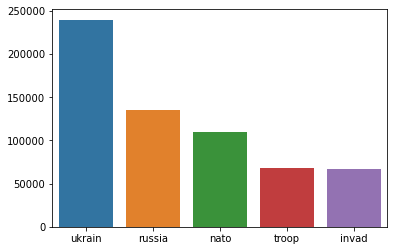

In [27]:
from collections import Counter
cnt = Counter()
cnt_all = Counter()

for text in lsss_pos:
    for word in text.split():
        cnt[word] += 1

print(cnt.most_common(5))
common_words = cnt.most_common(5)
print([i[0] for i in common_words])
sns.barplot(x = [i[0] for i in common_words], y = [i[1] for i in common_words])

In [28]:
import spacy
import en_core_web_sm


In [30]:
nlp = en_core_web_sm.load()
count =0
pos_keys = []
for i in lsss_pos:
    text = i
    doc = nlp(text)
    pos_keys.append(doc.ents)
    count += 1
    if count > 10000:
        break

count = 0
neg_keys = []
for i in lsss_neg:
    text = i
    doc = nlp(text)
    neg_keys.append(doc.ents)
    count += 1
    if count > 10000:
        break
        
count = 0
net_keys = []
for i in lsss_net:
    text = i
    doc = nlp(text)
    net_keys.append(doc.ents)
    count += 1
    if count > 10000:
        break
        
print(len(pos_keys), len(neg_keys), len(net_keys))

10001 10001 10001


In [31]:
#print(pos_keys)

In [32]:
pos_key1 = [val.text for code in pos_keys for val in code]
neg_key1 = [val.text for code in neg_keys for val in code]
net_key1 = [val.text for code in net_keys for val in code]
#pos_key1 = set(pos_key1)
#print(pos_key1)

In [33]:
pos_key1[0]

'lhfang'

In [34]:
from collections import Counter
cnt = Counter()
cnt_all = Counter()

for text in pos_key1:
    cnt[text] += 1

#print(cnt)
common_words = cnt.most_common(5)
#print([i[0] for i in common_words])
#sns.barplot(x = [i[0] for i in common_words], y = [i[1] for i in common_words])

In [35]:
#pos_key1

In [39]:
#from tensorflow import keras
import tensorflow as tf
#from tf.keras.preprocessing.text import Tokenizer
#from nltk.tokenize import word_tokenize
#from tokenize import tokenize

In [40]:
docs = pos_key1 + neg_key1 + net_key1

In [41]:
#tokenizer = tf.keras.preprocessing.text.Tokenizer()
#tokenizer =  tokenize

In [42]:
#tokenizer.fit_on_texts(docs)


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, f1_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df['text_lemmatized'],df['Sentiment'], test_size=0.3,random_state=0)

In [99]:

t_tweet = TfidfVectorizer(min_df = 5).fit(X_train)
#Create the SVM Model and fit the train and test data



In [77]:
# Fit the training data to Count Vectorizer
cVector = CountVectorizer().fit(X_train)
X_train_vect = cVector.transform(X_train)


In [78]:
svm_tweet_model = svm.SVC(kernel='linear')
# train the classifier: 
svm_tweet_model.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [79]:
# Predict the Y-test data with the above Model
y_pred_tweet = svm_tweet_model.predict(cVector.transform(X_test))
print(classification_report(y_test, y_pred_tweet))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_tweet)))
print('F1_score: ', round(f1_score(y_test, y_pred_tweet,average='micro')))

              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      2916
     Neutral       0.86      0.91      0.89      1499
    Positive       0.78      0.74      0.76      1585

    accuracy                           0.84      6000
   macro avg       0.83      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000

Accuracy score:  1
F1_score:  1


In [80]:
accuracy_score(y_test, y_pred_tweet)

0.8416666666666667

In [81]:
xTrain_tweets_tVect = t_tweet.transform(X_train)
tweet_Model = svm.SVC(kernel='linear')
tweet_Model.fit(xTrain_tweets_tVect, y_train)
prediction_tweets = tweet_Model.predict(t_tweet.transform(X_test))
print('accuracy :', accuracy_score(y_test, prediction_tweets))


accuracy : 0.8418333333333333


In [90]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[Text(0.5, 1.0, 'Negative/Positive/Neutral')]

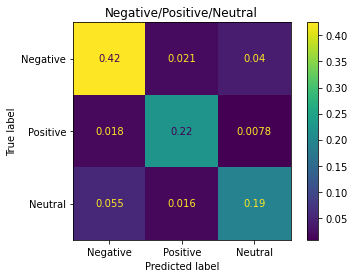

In [96]:
cm = confusion_matrix(y_test, prediction_tweets, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive','Neutral'])
cmd.plot()
cmd.ax_.set(title='Negative/Positive/Neutral')

In [54]:
#df["text_lemmatized"][:10]

In [55]:
import re  # Library for regular opeartions expressions
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []

    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            stem_word = stemmer.stem(word)  #stemming
            tweets_clean.append(stem_word)
  
    return tweets_clean

In [56]:
# Logistic Regression

def sigmoid(z):
    h = 1/(1+np.exp(-z))
    return h

In [57]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = x.shape[0]
    for i in range(num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)

        # cost function
        J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))

        # update the weights theta
        theta = theta - (alpha/m)* (np.dot(x.T, h-y))
    J = float(J)
    return J, theta

In [58]:
def extract_features(tweet, freqs):
    # Process the tweet
    word_l = process_tweet(tweet)
    #word_l = tweet
    x = np.zeros((1, 3))
    # bias term is set to 1
    x[0, 0] = 1

    for word in word_l:
        x[0, 1] += freqs.get((word, 1), 0)
        x[0, 2] += freqs.get((word, 0), 0)
        
    assert(x.shape==(1, 3))
    return x

In [59]:
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair] =1
    return freqs

In [60]:
train_pos = df[df["Sentiment"] == "Positive"]['text_lemmatized']
test_pos = df[df["Sentiment"] == "Positive"]['text_lemmatized']

train_neg = df[df["Sentiment"] == "Negative"]['text_lemmatized']
test_neg = df[df["Sentiment"] == "Negative"]['text_lemmatized']

train_neu = df[df["Sentiment"] == "Neutral"]['text_lemmatized']
test_neu = df[df["Sentiment"] == "Neutral"]['text_lemmatized']

train_pos = str(train_pos)
test_pos = str(test_pos)
train_neg = str(train_neg)
test_neg = str(test_neg)
train_neu = str(train_neu)
test_neu = str(test_neu)


train_x =   train_neg + train_neu
test_x =  test_neg + test_neu

# making a numpy labels array

train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [61]:
freqs = build_freqs(train_x, train_y)

print('Type of freqs : ', type(freqs))
print('Length of freqs : ', len(freqs))

Type of freqs :  <class 'dict'>
Length of freqs :  51


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df['text_lemmatized'],df['Sentiment'], test_size=0.3,random_state=0)

In [63]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :] = extract_features(train_x[i], freqs)

# training levels corrosponding to X
Y = train_y

# Applying Gradient Descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.69314717.
The resulting vector of weights is [0.0, 8e-08, -8e-08]


In [64]:
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet, freqs) 
    # make prediction
    y_pred = sigmoid(np.dot(x, theta))
    return y_pred

In [97]:
def test_logistic_regression(test_x, test_y, feqs, theta):
    # empty list for storing predictions
    y_hat = []

    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred >0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)
    
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    return accuracy 

In [98]:
accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print('The accuracy of Logistic Regression is :', accuracy)

The accuracy of Logistic Regression is : 0.8210755813953488


In [67]:
txt = 'Russia should not pull back their millitary forces from ukraine border'
print(process_tweet(txt))
y_hat = predict_tweet(txt, freqs, theta)

if y_hat > 0.5:
    print('Positive')
else:
    print('Negative')

['russia', 'pull', 'back', 'millitari', 'forc', 'ukrain', 'border']
Positive
